In [1]:
import bt
import pandas
import matplotlib
import matplotlib.pyplot as plt
import talib

In [2]:
matplotlib.use('TkAgg')
%matplotlib inline

In [3]:
stock_symbol = 'spy, tsla'
start_date = '2011-1-1'
end_date = '2020-12-1'

In [4]:
price_data = bt.get(stock_symbol, start=start_date)

In [5]:
bt_strategy = bt.Strategy('Strat1',
                         [
                             bt.algos.RunWeekly(),
                             bt.algos.SelectAll(),
                             bt.algos.WeighSpecified(spy=0.3, tsla=0.7),
                             bt.algos.Rebalance()
                         ])

In [6]:
bt_backtest = bt.Backtest(bt_strategy, price_data)

In [7]:
bt_result = bt.run(bt_backtest)

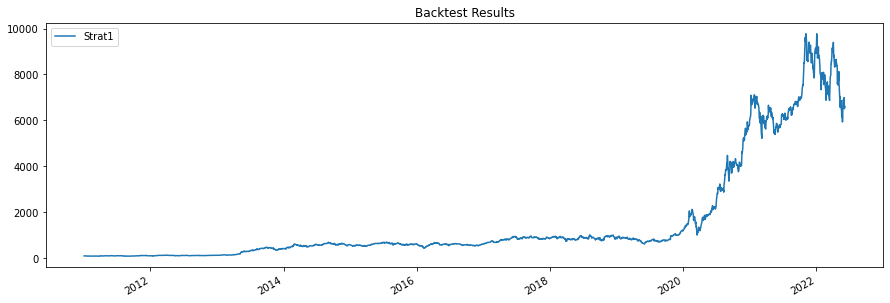

In [8]:
bt_result.plot(title='Backtest Results')
plt.show()

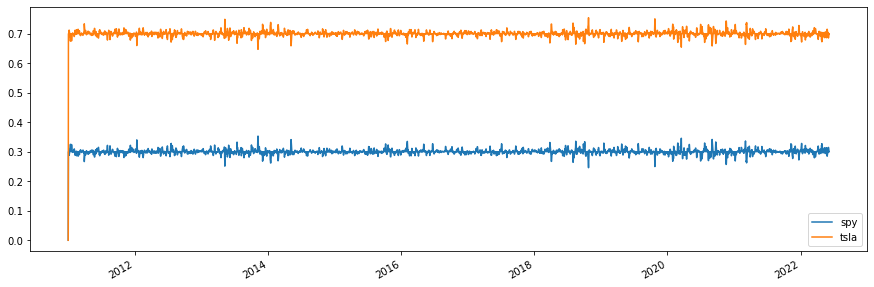

In [9]:
bt_result.plot_security_weights()

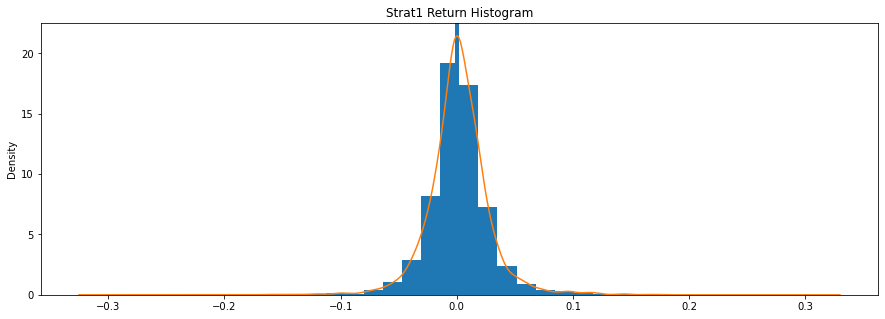

In [10]:
bt_result.plot_histogram()

In [11]:
bt_result.get_security_weights()

,spy,tsla
2011-01-02,0.000000,0.000000
2011-01-03,0.299919,0.700000
2011-01-04,0.299410,0.700509
2011-01-05,0.299243,0.700677
2011-01-06,0.290852,0.709070
...,...,...
2022-06-01,0.303316,0.696674
2022-06-02,0.297673,0.702318
2022-06-03,0.314702,0.685288
2022-06-06,0.299999,0.699990


In [12]:
resInfo = bt_result.stats

In [13]:
resInfo

,Strat1
start,2011-01-02 00:00:00
end,2022-06-07 00:00:00
rf,0.0
total_return,65.062073
cagr,0.442968
max_drawdown,-0.525956
calmar,0.842216
mtd,-0.037777
three_month,-0.071996
six_month,-0.250521


In [14]:
resInfo.loc['cagr']['Strat1'] * 100

44.29680587434597